In [80]:
import numpy as np
from NeuralNetworkModule import *
import matplotlib.pyplot as plt

In [77]:
def train_model(model, epochs, learning_rate):
    loss_list=[]
    # Train the model
    for epoch in range(epochs):
        output = model.forward(X)
        cross_entropy = BinaryCrossEntropyLoss(output, y)
        loss,grad_loss= cross_entropy.calculate_loss_gradient()
        model.backward(grad_loss,learning_rate = learning_rate)
        loss_list.append(loss)
        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    print(f'Epoch {epoch}, Loss: {loss}')

    return model,loss_list

In [78]:
# XOR problem data
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
learning_rate=0.01
epochs = 200

# Build the neural network
model = Sequential([
    Linear(2, 10),
    Sigmoid(),
    Linear(10, 1),
    Sigmoid()
])

trained_model,sigmoid_loss= train_model(model,epochs,learning_rate)
trained_model.save_weights('XOR_solved.w')

# Reload and predict

# Build the neural network
model = Sequential([
    Linear(2, 10),
    Sigmoid(),
    Linear(10, 1),
    Sigmoid()
])

model.load_weights('XOR_solved.w.npz')
preds=model.forward(X)
print("Prediciton Probabilities ",preds)
print("Model Accuracy ",sum([y[i][0]==int(preds[i][0]>=0.5) for i in range(len(preds))])*100/len(y), "%")


Epoch 0, Loss: 1.2834447580414703
Epoch 50, Loss: 0.6887703883672417
Epoch 100, Loss: 0.6666922338111656
Epoch 150, Loss: 0.6373732925386422
Epoch 199, Loss: 0.5947327570958789
Prediciton Probabilities  [[0.36873457]
 [0.54526118]
 [0.56110358]
 [0.51825438]]
Model Accuracy  75.0 %


In [79]:
# Build the neural network
model = Sequential([
    Linear(2, 10),
    Tanh(),          #replacing sigmoif with tanh
    Linear(10, 1),
    Sigmoid()
])

trained_model,tanh_loss= train_model(model,epochs,learning_rate)
preds=trained_model.forward(X)
print("Prediciton Probabilities ",preds)
print("Model Accuracy ",sum([y[i][0]==int(preds[i][0]>=0.5) for i in range(len(preds))])*100/len(y), "%")

Epoch 0, Loss: 0.8632439396508211
Epoch 50, Loss: 0.09846490600028047
Epoch 100, Loss: 0.04478779650803254
Epoch 150, Loss: 0.02727401378618173
Epoch 199, Loss: 0.01921697246108636
Prediciton Probabilities  [[0.01029278]
 [0.97838585]
 [0.98214731]
 [0.02584078]]
Model Accuracy  100.0 %


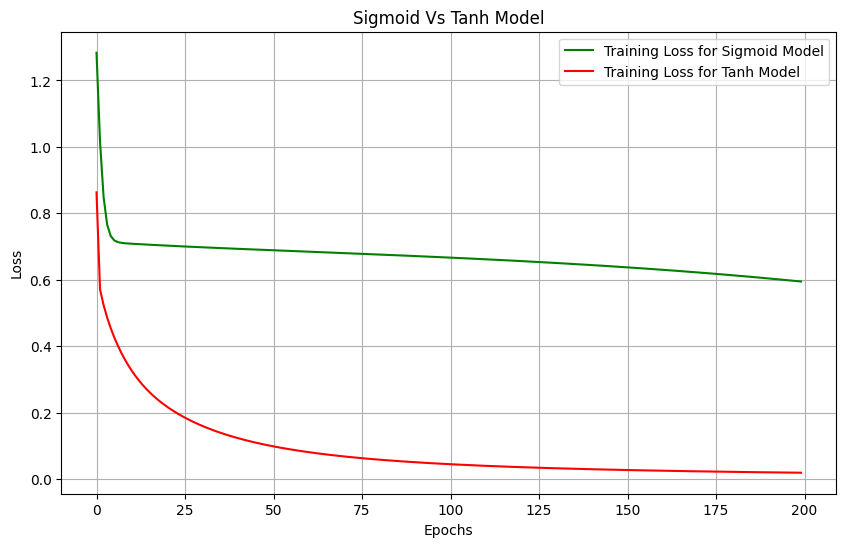

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(sigmoid_loss, label="Training Loss for Sigmoid Model", color="green")
plt.plot(tanh_loss, label="Training Loss for Tanh Model", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Sigmoid Vs Tanh Model")
plt.legend()
plt.grid(True)
plt.show()